<a href="https://colab.research.google.com/github/vamsikrishnakonidena/MachineLearning/blob/Iris-Flowers-Classification/projectML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
#pandas to work with csv file like input,output separation
from sklearn.preprocessing import LabelEncoder,StandardScaler
#above import is for we have to encode the output since it is non numerical
from sklearn.model_selection import train_test_split
#to split the dataset to training and testing

from keras.models import Sequential
#to build artificial neural network
from keras.layers import Dense
# to add layers to ANN
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import sklearn as sk
#all the above for remaining purposes

In [3]:
data=pd.read_csv("/content/IRIS.csv")
#loading the data set and printing the first five rows
print(data.head(5))
print()
print("Shape of the data is",data.shape)
print()
print("The species in the iris flowers are")
print(data['species'].unique())
print()
print("data information is")
print(data.info())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Shape of the data is (150, 5)

The species in the iris flowers are
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

data information is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usag

In [4]:
x=data.drop(['species'],axis=1)
y_=data['species']
#spliting dataset into input and output
print(x.head(5))
print("shape of input features is",x.shape)
print("Shape of output features is",y_.shape)
print(y_.value_counts())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
shape of input features is (150, 4)
Shape of output features is (150,)
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [32]:
lbEncoder=LabelEncoder()
#encoding the output ,so it converts into numerical data
y_encoded=lbEncoder.fit_transform(y_)
print("Y encoded data is")
print(y_encoded)
y_final = tf.keras.utils.to_categorical(y_encoded)
#further more encoding to categorical data
print()
print("y_final is")
print(y_final)
print("The final output shape is",y_final.shape)


Y encoded data is
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

y_final is
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y_final,test_size=0.25,random_state=1)
#dividing input and output into train and test
print("Training input shape is:",x_train.shape)
print("Training output shape is:",y_train.shape)
print("Testing input shape is:",x_test.shape)
print("Testing output is:",y_test.shape)

Training input shape is: (112, 4)
Training output shape is: (112, 3)
Testing input shape is: (38, 4)
Testing output is: (38, 3)


In [7]:
std=StandardScaler()
x_train_new=std.fit_transform(x_train)
x_test_new=std.fit_transform(x_test)
print("After standardzing x_train data is")
print(x_train_new[:5,:])
#standarzing the data is very important inorder to extract infromation effectly
print()
print("After standardzing x_test data is")
print(x_test_new[:5,:])

After standardzing x_train data is
[[ 0.80347326 -0.53260596  0.45425177  0.3800208 ]
 [ 1.04344393 -1.25712258  1.1318482   0.7693104 ]
 [ 1.16342927 -0.04959489  0.96244909  1.1586    ]
 [-0.8763215   1.15793281 -1.35267203 -1.1771376 ]
 [ 0.20354656 -1.9816392   0.68011725  0.3800208 ]]

After standardzing x_test data is
[[-0.10202172  1.81150618 -1.42711367 -1.33435824]
 [-0.97743387 -1.3951973  -0.37862199 -0.10097846]
 [ 0.89844931 -0.32629614  0.43687153  0.31014813]
 [-0.60225723  1.59772594 -1.36886413 -1.06027384]
 [ 2.52421474  1.38394571  1.60186228  1.13240132]]


In [8]:
model = Sequential()

#it is the building architecture of the artificial neural network
model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation='relu', name='fc2'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(Dense(10,activation='relu',name='fc3'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
iris_model=model.fit(x_train,y_train, verbose=2, batch_size=5, epochs=200)





Epoch 1/200
23/23 - 2s - loss: 1.2077 - accuracy: 0.4196 - 2s/epoch - 73ms/step
Epoch 2/200
23/23 - 0s - loss: 1.1139 - accuracy: 0.4286 - 68ms/epoch - 3ms/step
Epoch 3/200
23/23 - 0s - loss: 1.0804 - accuracy: 0.4643 - 51ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 1.0397 - accuracy: 0.5714 - 50ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 1.0051 - accuracy: 0.5268 - 49ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 1.0150 - accuracy: 0.5982 - 57ms/epoch - 2ms/step
Epoch 7/200
23/23 - 0s - loss: 0.9800 - accuracy: 0.5625 - 55ms/epoch - 2ms/step
Epoch 8/200
23/23 - 0s - loss: 0.9683 - accuracy: 0.5625 - 56ms/epoch - 2ms/step
Epoch 9/200
23/23 - 0s - loss: 0.9234 - accuracy: 0.6696 - 60ms/epoch - 3ms/step
Epoch 10/200
23/23 - 0s - loss: 0.9343 - accuracy: 0.6161 - 51ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.8670 - accuracy: 0.6161 - 63ms/epoch - 3ms/step
Epoch 12/200
23/23 - 0s - loss: 0.8419 - accuracy: 0.6786 - 56ms/epoch - 2ms/step
Epoch 13/200
23/23 - 0s - 

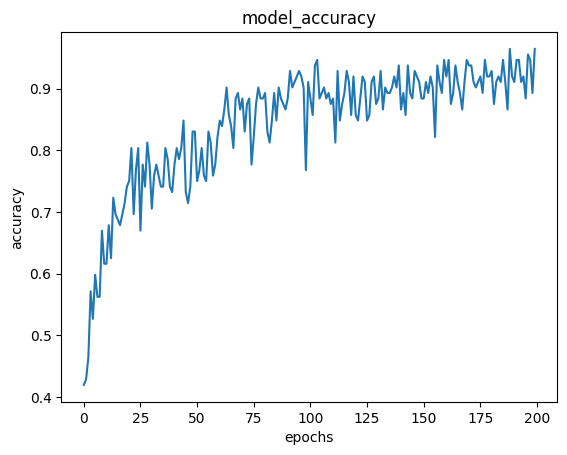

In [9]:
import matplotlib.pyplot as plt
plt.plot(iris_model.history['accuracy'])
plt.title('model_accuracy')
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

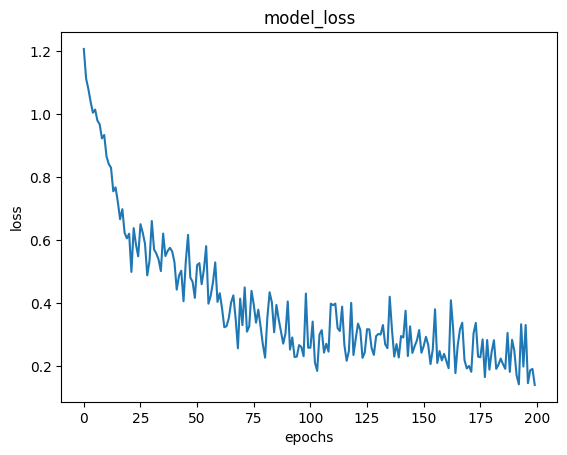

In [10]:
plt.plot(iris_model.history['loss'])
plt.title('model_loss')
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

In [11]:
results =model.evaluate(x_test,y_test)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

2/2 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 1.0000
Final test set loss: 0.030664
Final test set accuracy: 1.000000


In [29]:
sepal_length=float(input("Enter sepal length:"))
sepal_width=float(input("Enter sepal width:"))
petal_length=float(input("Enter petal length:"))
petal_width=float(input("Enter petal width:"))
prob=model.predict([[sepal_length,sepal_width,petal_length,petal_width]])
ind=prob.argmax()
if ind==0:
  print("The iris flower type is Iris-Setosa")
elif ind==1:
  print("The Iris flower type is Iris-Versicolor")
else:
  print("The Iris flower type is Iris-virginica")

Enter sepal length:5.2
Enter sepal width:4.1
Enter petal length:1.5
Enter petal width:0.2
1/1 [==============================] - 0s 53ms/step
The iris flower type is Iris-Setosa


1
